In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [13]:
series=[750,350,650,500,250,450,200,750,500,400,350,600,750,250,300,500,850,400,950,250,550,700,300,850,500,900,200,750]
index=pd.date_range('2006-03-31',periods=28,freq='Q')
data=pd.DataFrame(series, index=index)
data.columns=['Demand']
data

,Demand
2006-03-31,750
2006-06-30,350
2006-09-30,650
2006-12-31,500
2007-03-31,250
2007-06-30,450
2007-09-30,200
2007-12-31,750
2008-03-31,500
2008-06-30,400


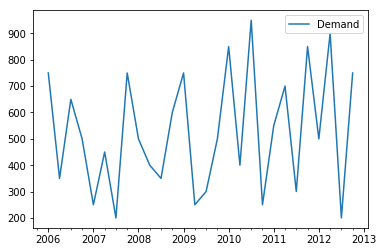

In [14]:
data.plot()

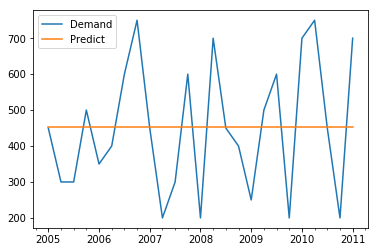

In [35]:
fit1=SimpleExpSmoothing(data['Demand']).fit()
data['Predict']=fit1.fittedvalues
data.plot()

In [16]:
sqrt(mean_squared_error(data['Demand'],data['Predict']))

225.7851945580859

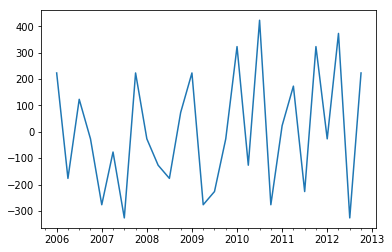

In [17]:
data['Resid']=fit1.resid
data['Resid'].plot()

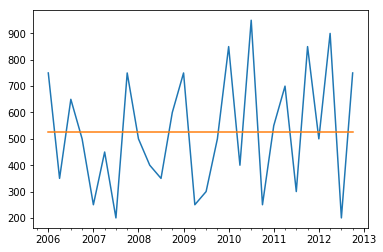

In [18]:
index=pd.date_range('2006-06-30',periods=4, freq='Q')
datap=pd.DataFrame(fit1.forecast(4),index=index)
datap.columns=['Predict']
data['Demand'].plot()
data['Predict'].plot()

In [54]:
series=[750,350,650,500,250,450,200,750,500,400,350,600,750,250,300,500,850,400,950,250,550,700,300,850,500,900,200,750]
index=pd.date_range('2006-03-31',periods=28, freq='Q')
data=pd.DataFrame(series, index=index)
data.columns=['Demand']

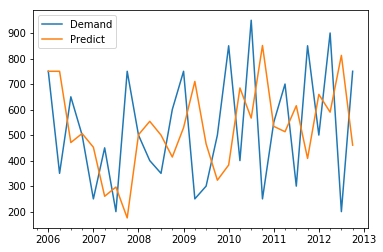

In [59]:
fit1=Holt(data['Demand']).fit()
data['Predict']=fit1.fittedvalues
data.plot()

In [60]:
sqrt(mean_squared_error(data['Demand'], data['Predict']))

312.0125047119369

In [61]:
mean_absolute_error(data['Demand'], data['Predict'])

258.2030355874385

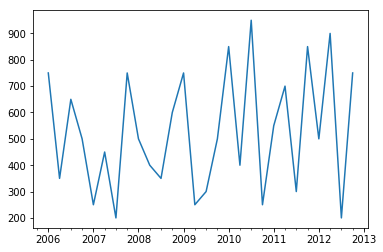

In [62]:
index=pd.date_range('2006-03-31', periods=4, freq='Q')
datap=pd.DataFrame(fit1.forecast(4),index=index)
datap.columns=['Predict']
data['Demand'].plot()
datap['Predict'].plot()

In [63]:
fit1.params

{'smoothing_level': 0.47368421052631576,
 'smoothing_slope': 0.47368421052631576,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 750.0,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

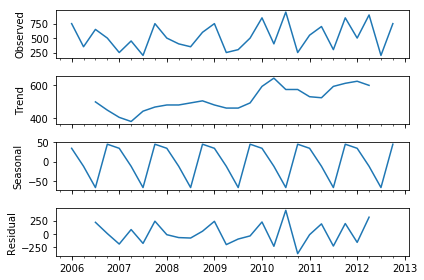

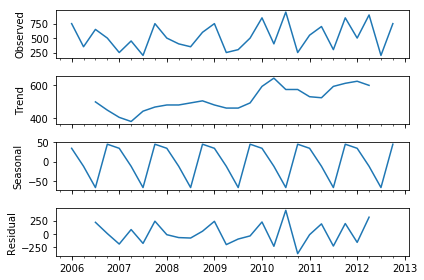

In [64]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(data['Demand']).plot()

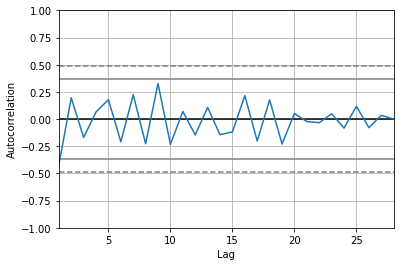

In [65]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Demand'])

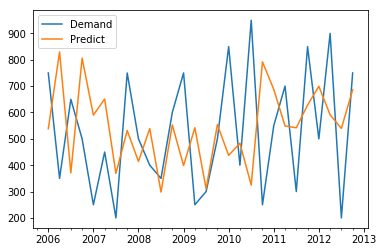

In [66]:
fit1 = ExponentialSmoothing(data['Demand'], seasonal_periods=4,
                           trend='add', seasonal='mul').fit()
data['Predict']=fit1.fittedvalues
data.plot()

In [67]:
sqrt(mean_squared_error(data['Demand'], data['Predict']))

279.6079144657625

In [68]:
mean_absolute_error(data['Demand'], data['Predict'])

234.4711627047403

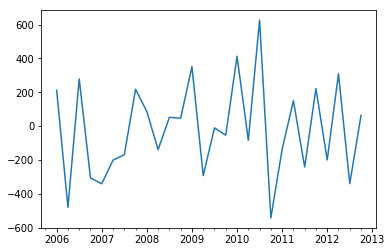

In [69]:
data['Resid']=fit1.resid
data['Resid'].plot()

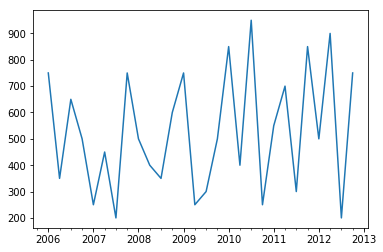

In [70]:
index=pd.date_range('2006-03-31', periods=4, freq='Q')
datap=pd.DataFrame(fit1.forecast(4), index=index)
datap.columns=['Predict']
data['Demand'].plot()
datap['Predict'].plot()

In [71]:
fit1.params

{'smoothing_level': 0.15789461215988132,
 'smoothing_slope': 0.15789540181396622,
 'smoothing_seasonal': 0.15789540181396622,
 'damping_slope': nan,
 'initial_level': 592.8568254487162,
 'initial_slope': 0.0,
 'initial_seasons': array([0.90776403, 1.30564266, 0.64613428, 1.2408479 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}